### **Paso 1: Descargar los Datasets**

Primero, descargaremos los archivos desde las URLs. Este código manejará la descarga y descompresión de los datos:

In [2]:
!wget --no-check-certificate -O Software.jsonl.gz https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Software.jsonl.gz
!wget --no-check-certificate -O Digital_Music.jsonl.gz https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz

--2024-05-10 22:08:02--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Software.jsonl.gz
Resolving datarepo.eng.ucsd.edu... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502367838 (479M) [application/x-gzip]
Saving to: ‘Software.jsonl.gz’

Software.jsonl.gz   100%[===================>] 479.09M   767KB/s    in 7m 42s  

2024-05-10 22:15:54 (1.04 MB/s) - ‘Software.jsonl.gz’ saved [502367838/502367838]

--2024-05-10 22:15:54--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz
Resolving datarepo.eng.ucsd.edu... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26231818 (25M) [application/x-gzip]
Saving to: ‘Digital_Music.jsonl.gz’

Digital_Music.jsonl 100%[===================>]  25.02M  1.12MB/s    in 26s     

2024-05-10 22

In [3]:
!ls -lh

total 1189776
-rw-r--r--@ 1 otgerpeidro  staff    25M Feb 26 21:07 Digital_Music.jsonl.gz
-rw-r--r--@ 1 otgerpeidro  staff   826K May 10 22:08 Practica_Otger_Peidro.ipynb
-rw-r--r--@ 1 otgerpeidro  staff   479M Feb 26 22:57 Software.jsonl.gz
-rw-r--r--@ 1 otgerpeidro  staff    13M May  8 21:29 meta_Digital_Music.jsonl.gz
-rw-r--r--@ 1 otgerpeidro  staff    62M May  8 22:44 meta_Software.jsonl.gz


In [4]:
import subprocess

# Ejecutar el comando y capturar la salida
result = subprocess.run("zcat Software.jsonl.gz | head", shell=True, text=True, capture_output=True)
print(result.stdout)


In [5]:
import subprocess

# Ejecutar el comando y capturar la salida
result = subprocess.run("zcat Digital_Music.jsonl.gz | head", shell=True, text=True, capture_output=True)
print(result.stdout)


In [24]:
import gzip
import json
import pandas as pd

def load_data(filename):
    data = []
    with gzip.open(filename, 'rt', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

# Cargar datos
software_data = load_data('Software.jsonl.gz')
digital_music_data = load_data('Digital_Music.jsonl.gz')

# Comprobando el contenido
print("Número de reseñas en Software:", len(software_data))
print("Número de reseñas en Digital Music:", len(digital_music_data))

Número de reseñas en Software: 4880181
Número de reseñas en Digital Music: 130434


### **Paso 2: Análisis Exploratorio Básico**


Vamos a explorar los datos básicos de los DataFrames:

In [10]:
# Verificando las columnas disponibles
print("Columnas disponibles en el dataset de Software:", software_data.columns)

# Inspeccionando las primeras filas para entender mejor la estructura del data
print("Primeras filas del dataset de Software:", software_data.head())

# Suponiendo que hemos identificado que la columna de calificaciones se llama 'rating'
print("Distribución de estrellas:", software_data['rating'].value_counts(normalize=True))



Columnas disponibles en el dataset de Software: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
Primeras filas del dataset de Software:    rating                                     title  \
0     1.0                                   malware   
1     5.0                               Lots of Fun   
2     5.0                         Light Up The Dark   
3     4.0                                  Fun game   
4     4.0  I am not that good at it but my kids are   

                                                text images        asin  \
0                                 mcaffee IS malware     []  B07BFS3G7P   
1  I love playing tapped out because it is fun to...     []  B00CTQ6SIG   
2  I love this flashlight app!  It really illumin...     []  B0066WJLU6   
3                           One of my favorite games     []  B00KCYMAWK   
4  Cute game. I am not that good at it but my ki

In [11]:
# Verificando las columnas disponibles
print("Columnas disponibles en el dataset de Digital Music:", digital_music_data.columns)

# Inspeccionando las primeras filas para entender mejor la estructura del data
print("Primeras filas del dataset de Digital Music:", digital_music_data.head())

# Suponiendo que hemos identificado que la columna de calificaciones se llama 'rating'
print("Distribución de estrellas:", digital_music_data['rating'].value_counts(normalize=True))

Columnas disponibles en el dataset de Digital Music: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
Primeras filas del dataset de Digital Music:    rating                             title  \
0     5.0                              Nice   
1     5.0                         Excellent   
2     5.0                     Great service   
3     1.0                           No good   
4     3.0  Cool concept, so-so execution...   

                                                text images        asin  \
0  If i had a dollar for how many times I have pl...     []  B004RQ2IRG   
1  awesome sound - cant wait to see them in perso...     []  B0026UZEI0   
2  This is a great cd. Good music and plays well....     []  B0055JSYHC   
3  These are not real German singers, they have a...     []  B000F9SMUQ   
4  I first heard this playing in a Nagoya shop an...     []  B0049D1WVK   

  parent_a

In [12]:
def explore_data(df, category):
    print(f"Explorando datos para {category}:")
    print("Número total de reviews:", len(df))
    print("Primer review:", df.iloc[0])
    print("Distribución de estrellas:", df['rating'].value_counts(normalize=True))
    print("\n")

# Exploración de cada dataset
explore_data(software_data, 'Software')
explore_data(digital_music_data, 'Digital Music')

Explorando datos para Software:
Número total de reviews: 4880181
Primer review: rating                                        1.0
title                                     malware
text                           mcaffee IS malware
images                                         []
asin                                   B07BFS3G7P
parent_asin                            B0BQSK9QCF
user_id              AGCI7FAH4GL5FI65HYLKWTMFZ2CQ
timestamp                           1562182632076
helpful_vote                                    0
verified_purchase                           False
Name: 0, dtype: object
Distribución de estrellas: rating
5.0    0.546831
4.0    0.175625
1.0    0.142588
3.0    0.085930
2.0    0.049025
Name: proportion, dtype: float64


Explorando datos para Digital Music:
Número total de reviews: 130434
Primer review: rating                                                             5.0
title                                                             Nice
text                 I

In [13]:
def categorize_sentiments(data, rating_col):
    data['sentiment'] = data[rating_col].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))
    return data

# Aplica la función a ambos datasets
software_data = categorize_sentiments(software_data, 'rating')
digital_music_data = categorize_sentiments(digital_music_data, 'rating')

# Mostrar la distribución de sentimientos
print("Distribución de sentimientos en Software:", software_data['sentiment'].value_counts(normalize=True))
print("Distribución de sentimientos en Digital Music:", digital_music_data['sentiment'].value_counts(normalize=True))


Distribución de sentimientos en Software: sentiment
positive    0.722456
negative    0.191613
neutral     0.085930
Name: proportion, dtype: float64
Distribución de sentimientos en Digital Music: sentiment
positive    0.879732
negative    0.071262
neutral     0.049006
Name: proportion, dtype: float64


### **Paso 3: Análisis Más Detallado**

# **Frecuencia de palabras, n-grams y nubes de palabras**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def analyze_text(data, text_col):
    # Palabras más frecuentes
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data[text_col])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    print("Palabras más frecuentes:", sorted_word_freq[:10])

# Aplicar a ambos datasets
print("Análisis de Texto para Software:")
analyze_text(software_data, 'text')
print("Análisis de Texto para Digital Music:")
analyze_text(digital_music_data, 'text')


Análisis de Texto para Software:
Palabras más frecuentes: [('game', 1940956), ('br', 1065196), ('fun', 886330), ('app', 866495), ('love', 796599), ('like', 760211), ('great', 743557), ('good', 581144), ('play', 553833), ('time', 507409)]
Análisis de Texto para Digital Music:
Palabras más frecuentes: [('br', 169046), ('cd', 52333), ('music', 44094), ('album', 40419), ('great', 39293), ('34', 30638), ('love', 29684), ('songs', 27973), ('like', 27564), ('good', 24862)]


## **Calcularemos la cardinalidad del vocabulario, n-grams más frecuentes y generaremos nubes de palabras**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

def calculate_vocabulary_cardinality(data, text_col):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data[text_col].dropna())  # Asegurar que no hay NaNs
    return len(vectorizer.get_feature_names_out())

def find_frequent_ngrams(data, text_col, n=2, top=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(data[text_col].dropna())
    counts = X.sum(axis=0)
    ngrams = [(ngram, counts[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    ngrams = sorted(ngrams, key=lambda x: x[1], reverse=True)[:top]
    return ngrams


# Descarga de stop words
nltk.download('stopwords')

# Configuración de stop words en inglés
stop_words = set(stopwords.words('english'))

def generate_wordcloud(data, text_col):
    # Concatena todos los textos
    text = ' '.join(data[text_col].dropna())

    # Filtra las stop words
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    # Genera la nube de palabras
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/otgerpeidro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Software Data Analysis
Cardinalidad del vocabulario (Software): 339769
N-grams más frecuentes (Software): [('br br', 336642), ('love game', 167706), ('great game', 135003), ('fun game', 132603), ('easy use', 92196), ('good game', 84913), ('game fun', 84818), ('game play', 64837), ('fun play', 60121), ('great app', 57395)]


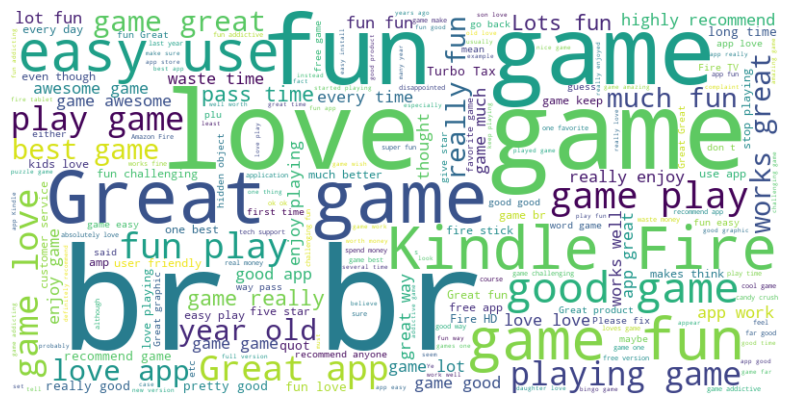


Digital Music Data Analysis
Cardinalidad del vocabulario (Digital Music): 120724
N-grams más frecuentes (Digital Music): [('br br', 47487), ('br 10', 2680), ('34 34', 2611), ('great cd', 2336), ('br 11', 2267), ('sound quality', 2231), ('years ago', 2125), ('br 12', 2060), ('great music', 2055), ('love cd', 1872)]


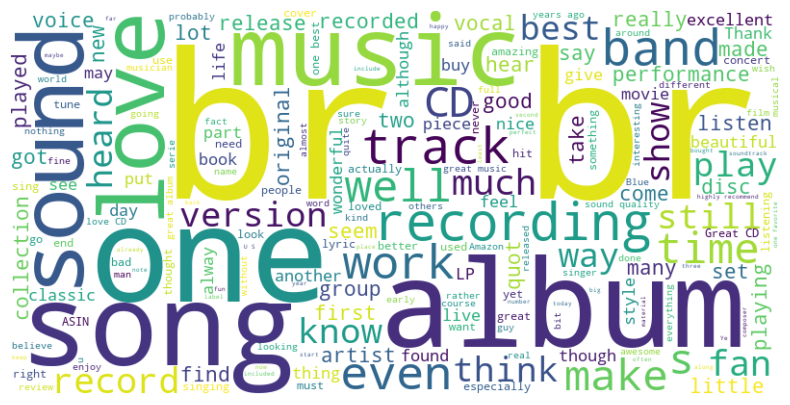

In [22]:
# Datos de Software
print("Software Data Analysis")
vocab_cardinality_software = calculate_vocabulary_cardinality(software_data, 'text')
print(f"Cardinalidad del vocabulario (Software): {vocab_cardinality_software}")
frequent_ngrams_software = find_frequent_ngrams(software_data, 'text')
print("N-grams más frecuentes (Software):", frequent_ngrams_software)
generate_wordcloud(software_data, 'text')

# Datos de Digital Music
print("\nDigital Music Data Analysis")
vocab_cardinality_music = calculate_vocabulary_cardinality(digital_music_data, 'text')
print(f"Cardinalidad del vocabulario (Digital Music): {vocab_cardinality_music}")
frequent_ngrams_music = find_frequent_ngrams(digital_music_data, 'text')
print("N-grams más frecuentes (Digital Music):", frequent_ngrams_music)
generate_wordcloud(digital_music_data, 'text')

### **Paso 4: Word Embeddings y Visualización**

Vamos a entrenar un modelo simple de Word2Vec y visualizar algunas palabras y sus vecinos más cercanos.

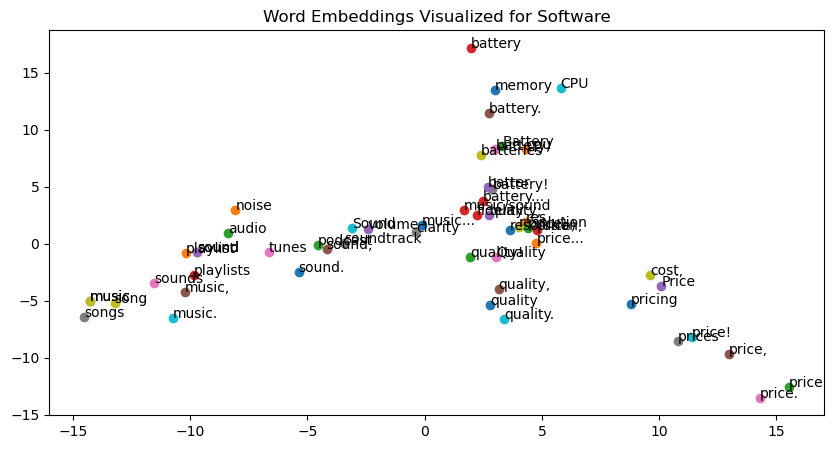

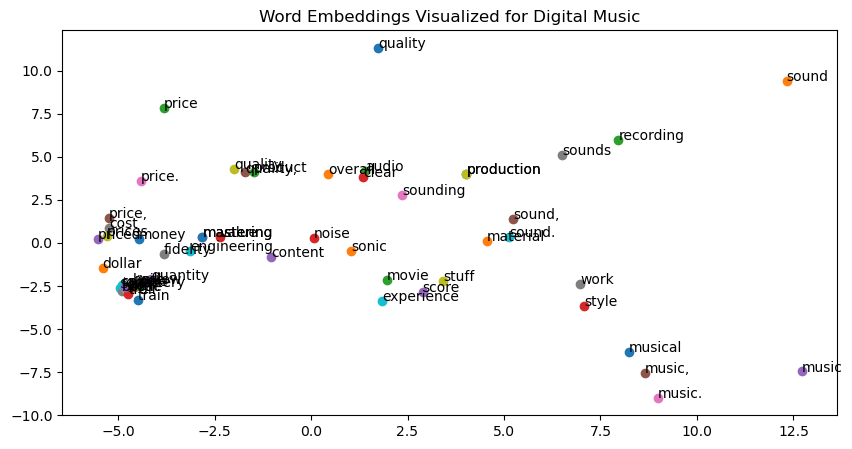

In [23]:
from scipy.linalg import triu
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embeddings(df, category):
    # Preparación de datos
    sentences = [review.split() for review in df['text'].dropna()]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

    # Palabras para visualización
    words = ['quality', 'sound', 'price', 'battery', 'music']
    top_similar = {word: model.wv.most_similar(word, topn=10) for word in words}

    # Reducción de dimensionalidad para visualización
    all_words = sum([[t[0] for t in top_similar[word]] for word in words], words)
    all_vectors = [model.wv[word] for word in all_words]
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(all_vectors)

    # Plot
    plt.figure(figsize=(10, 5))
    for word, (x, y) in zip(all_words, reduced_vectors):
        plt.scatter(x, y)
        plt.text(x, y, word)
    plt.title(f"Word Embeddings Visualized for {category}")
    plt.show()

# Visualizamos embeddings
visualize_embeddings(software_data, 'Software')
visualize_embeddings(digital_music_data, 'Digital Music')


### Conclusiones de la Exploración de Datos de "Software" y "Digital Music"

**Exploración General**
- **Software**: Con 4,880,181 reviews, el dataset de software muestra una predominancia de calificaciones positivas, donde las reseñas de 5 estrellas representan más de la mitad del total. Esto sugiere un alto nivel de satisfacción general de los usuarios con los productos de software revisados.
- **Digital Music**: Con 130,434 reviews, el dataset de música digital también muestra una inclinación hacia reseñas positivas, con una proporción aún más alta de reseñas de 5 estrellas que el dataset de software, lo que indica una gran satisfacción en el ámbito de la música digital.

**Vocabulario y Uso del Lenguaje**
- La cardinalidad del vocabulario y los n-grams más frecuentes reflejan las áreas de enfoque de cada categoría:
  - **Software**: Vocabulario centrado en términos como "game", "fun", "app", y expresiones relacionadas con la jugabilidad y la usabilidad, reflejando una gran cantidad de reviews relacionadas con juegos y aplicaciones.
  - **Digital Music**: Predominan términos como "cd", "music", "album", "songs", lo que es esperado en reseñas que probablemente discuten sobre la calidad de la música, artistas y experiencias auditivas.

**Word Embeddings**
- Las visualizaciones muestran cómo palabras claves como "quality", "price", "sound" están contextualmente relacionadas con otros términos específicos dentro de cada categoría. Esto es útil para entender cómo los usuarios relacionan características o atributos específicos con cada producto.

**Distribución de Sentimientos**
- **Software**: La distribución de sentimientos muestra un 72% de reseñas positivas, un 19% negativas y alrededor de un 9% neutrales.
- **Digital Music**: Hay un mayor porcentaje de sentimientos positivos (aproximadamente 88%), con una menor presencia de reseñas negativas y neutrales en comparación con el software, lo cual podría indicar una recepción más uniformemente positiva de los productos de música.

**Nubes de Palabras**
- Las nubes de palabras generadas son una representación visual de la frecuencia de términos dentro de cada dataset, proporcionando una vista intuitiva de los temas más discutidos en cada categoría. En ambos casos, los términos más prominentes parecen ser muy relevantes para su respectivo campo.

